# Introduction about the project

We apply the Regression Algorithm to predict: "Whether a loan could be paid-off or not" by accuracy evaluation methods.

#### Project Title: 

Loan Data Analysis and Prediction

#### Project Overview:

This project aims to analyze loan data and build a model to predict whether a borrower is likely to default on their loan or not. The loan data has features like loan ID, loan status, principal, terms, effective date, due date, paid-off time, past due days, age, education, and gender. The data can be obtained from Kaggle.


# Data Acquisition

In [792]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [793]:
# Import the data
df = pd.read_csv("C:/Pravalika_Workspace/Semester III - Academics/ADMN5016 - Applied AI and ML/Final Project/Loan dataset.csv")
df.head()

Loan_ID loan_status  Principal  terms effective_date    due_date  \
0  xqd20166231     PAIDOFF       1000     30     09-08-2016  10-07-2016   
1  xqd20168902     PAIDOFF       1000     30     09-08-2016  10-07-2016   
2  xqd20160003     PAIDOFF       1000     30     09-08-2016  10-07-2016   
3  xqd20160004     PAIDOFF       1000     15     09-08-2016   9/22/2016   
4  xqd20160005     PAIDOFF       1000     30     09-09-2016  10-08-2016   

      paid_off_time  past_due_days  age             education  Gender  
0   9/14/2016 19:31            NaN   45  High School or Below    male  
1  10-07-2016 09:00            NaN   50              Bechalor  female  
2   9/25/2016 16:58            NaN   33              Bechalor  female  
3   9/22/2016 20:00            NaN   27               college    male  
4   9/23/2016 21:36            NaN   28               college  female

# Data Preprocessing

#### Checking for duplicates

In [794]:
df.duplicated().sum()

0

#### Checking the data

In [795]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [796]:
df.shape

(500, 11)

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [798]:
df.describe()

Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       37.00000   30.000000
75%    1000.000000   30.000000       60.00000   35.000000
max    1000.000000   30.000000       76.00000   51.000000

### Checking for Missing values 

In [799]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [800]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df .shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [801]:
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
past_due_days             300               60.0
paid_off_time             100               20.0

We have 100 and 300 missing values in paid_off_time and pst_due_days respectively. This is because the customer has not paid the loan for missing values in paid_off_time and for past_due_days, it is because of the customer had made the payment on time. Here we need to do feature engineering.

###  Check the categories within the data sets 

In [802]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [803]:
df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

#### Spell Correction in education feature

In [804]:
df['education']= loan['education'].replace('Bechalor','Bachelor')

In [805]:
df.head()

Loan_ID loan_status  Principal  terms effective_date    due_date  \
0  xqd20166231     PAIDOFF       1000     30     09-08-2016  10-07-2016   
1  xqd20168902     PAIDOFF       1000     30     09-08-2016  10-07-2016   
2  xqd20160003     PAIDOFF       1000     30     09-08-2016  10-07-2016   
3  xqd20160004     PAIDOFF       1000     15     09-08-2016   9/22/2016   
4  xqd20160005     PAIDOFF       1000     30     09-09-2016  10-08-2016   

      paid_off_time  past_due_days  age             education  Gender  
0   9/14/2016 19:31            NaN   45  High School or Below    male  
1  10-07-2016 09:00            NaN   50              Bachelor  female  
2   9/25/2016 16:58            NaN   33              Bachelor  female  
3   9/22/2016 20:00            NaN   27               college    male  
4   9/23/2016 21:36            NaN   28               college  female

In [806]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

### Converting few features to datetime

In [807]:
#Coverting the following columns to 'datetime'
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time']).dt.date
#To Convert the 'paid_off_time' column to datetime64 type
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])
df.head()

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30     2016-09-08 2016-10-07   
1  xqd20168902     PAIDOFF       1000     30     2016-09-08 2016-10-07   
2  xqd20160003     PAIDOFF       1000     30     2016-09-08 2016-10-07   
3  xqd20160004     PAIDOFF       1000     15     2016-09-08 2016-09-22   
4  xqd20160005     PAIDOFF       1000     30     2016-09-09 2016-10-08   

  paid_off_time  past_due_days  age             education  Gender  
0    2016-09-14            NaN   45  High School or Below    male  
1    2016-10-07            NaN   50              Bachelor  female  
2    2016-09-25            NaN   33              Bachelor  female  
3    2016-09-22            NaN   27               college    male  
4    2016-09-23            NaN   28               college  female

In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   400 non-null    datetime64[ns]
 7   past_due_days   200 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.1+ KB


array([[<AxesSubplot:title={'center':'Principal'}>,
        <AxesSubplot:title={'center':'terms'}>,
        <AxesSubplot:title={'center':'effective_date'}>],
       [<AxesSubplot:title={'center':'due_date'}>,
        <AxesSubplot:title={'center':'paid_off_time'}>,
        <AxesSubplot:title={'center':'past_due_days'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

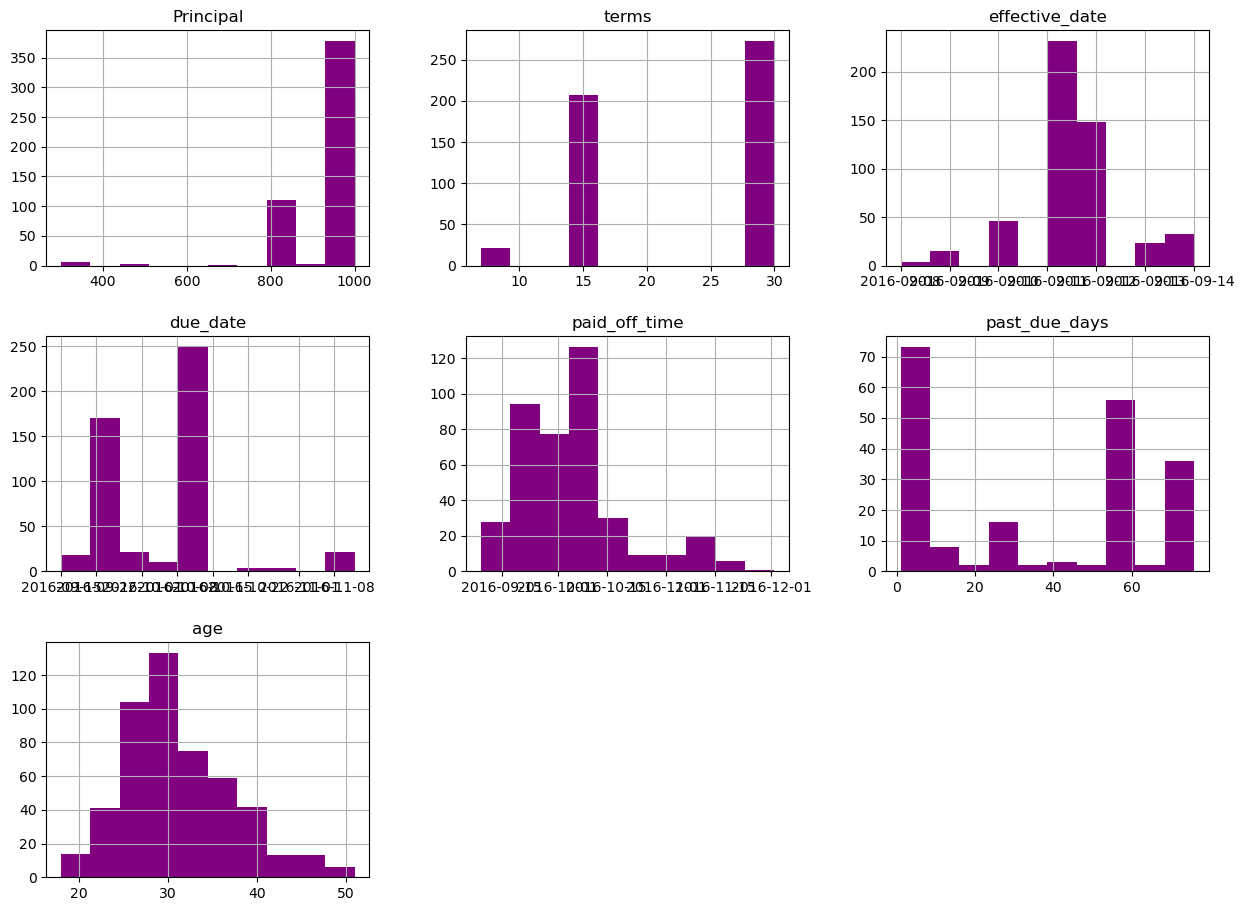

In [809]:
df.hist(figsize = (15,11), color="purple")

## Creating a copy of the dataset

In [810]:
df_fe = df.copy()

In [811]:
df_fe.head()

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30     2016-09-08 2016-10-07   
1  xqd20168902     PAIDOFF       1000     30     2016-09-08 2016-10-07   
2  xqd20160003     PAIDOFF       1000     30     2016-09-08 2016-10-07   
3  xqd20160004     PAIDOFF       1000     15     2016-09-08 2016-09-22   
4  xqd20160005     PAIDOFF       1000     30     2016-09-09 2016-10-08   

  paid_off_time  past_due_days  age             education  Gender  
0    2016-09-14            NaN   45  High School or Below    male  
1    2016-10-07            NaN   50              Bachelor  female  
2    2016-09-25            NaN   33              Bachelor  female  
3    2016-09-22            NaN   27               college    male  
4    2016-09-23            NaN   28               college  female

# Feature Engineering

### Replacing values in past_due_days column for PAIDOFF class

In [812]:
for i in range(len(df_fe[df_fe['loan_status']=="PAIDOFF"])):
    df_fe['past_due_days'][i] = (df_fe['paid_off_time'][i] - df_fe['effective_date'][i] + pd.Timedelta(days=1)).days - df_fe['terms'][i]
df_fe.head(10)

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30     2016-09-08 2016-10-07   
1  xqd20168902     PAIDOFF       1000     30     2016-09-08 2016-10-07   
2  xqd20160003     PAIDOFF       1000     30     2016-09-08 2016-10-07   
3  xqd20160004     PAIDOFF       1000     15     2016-09-08 2016-09-22   
4  xqd20160005     PAIDOFF       1000     30     2016-09-09 2016-10-08   
5  xqd20160706     PAIDOFF        300      7     2016-09-09 2016-09-15   
6  xqd20160007     PAIDOFF       1000     30     2016-09-09 2016-10-08   
7  xqd20160008     PAIDOFF       1000     30     2016-09-09 2016-10-08   
8  xqd20160909     PAIDOFF       1000     30     2016-09-09 2016-10-08   
9  xqd20160010     PAIDOFF        800     15     2016-09-10 2016-09-24   

  paid_off_time  past_due_days  age             education  Gender  
0    2016-09-14          -23.0   45  High School or Below    male  
1    2016-10-07            0.0   50              Bachelor  female  
2    2016-09-25          -12.0   33              Bachelor  female  
3    2016-09-22            0.0   27               college    male  
4    2016-09-23          -15.0   28               college  female  
5    2016-09-09           -6.0   35       Master or Above    male  
6    2016-10-07           -1.0   29               college    male  
7    2016-10-05           -3.0   36               college    male  
8    2016-10-08            0.0   28               college    male  
9    2016-09-24            0.0   26               college    male

### Records where the difference in the paid_off_time and effective_date is greater than the terms

In [813]:
df_fe[(df_fe['past_due_days']>0)&(df_fe['loan_status']=='PAIDOFF')]

Loan_ID loan_status  Principal  terms effective_date   due_date  \
11   xqd20160012     PAIDOFF       1000     15     2016-09-10 2016-10-09   
42   xqd20160043     PAIDOFF       1000      7     2016-09-11 2016-09-24   
85   xqd20160086     PAIDOFF       1000     30     2016-09-11 2016-11-09   
109  xqd20160110     PAIDOFF       1000      7     2016-09-11 2016-09-24   
111  xqd20160112     PAIDOFF       1000     30     2016-09-11 2016-11-09   
122  xqd20160123     PAIDOFF       1000     15     2016-09-11 2016-10-25   
137  xqd20160138     PAIDOFF       1000     15     2016-09-11 2016-10-25   
146  xqd20160147     PAIDOFF       1000     30     2016-09-11 2016-11-09   
150  xqd20160151     PAIDOFF       1000     15     2016-09-12 2016-10-26   
165  xqd20160166     PAIDOFF       1000     30     2016-09-12 2016-11-10   
196  xqd20160197     PAIDOFF       1000     30     2016-09-12 2016-11-10   
206  xqd20160207     PAIDOFF       1000     30     2016-09-12 2016-11-10   
215  xqd20160216     PAIDOFF       1000     30     2016-09-12 2016-11-10   
222  xqd20160223     PAIDOFF       1000     30     2016-09-12 2016-11-10   
230  xqd20160231     PAIDOFF       1000     15     2016-09-12 2016-10-26   
231  xqd20160232     PAIDOFF       1000      7     2016-09-12 2016-09-25   
238  xqd20160239     PAIDOFF       1000     15     2016-09-12 2016-10-11   
270  xqd20160271     PAIDOFF       1000     30     2016-09-14 2016-10-13   
272  xqd20160273     PAIDOFF       1000     30     2016-09-14 2016-11-12   
285  xqd20160286     PAIDOFF       1000     30     2016-09-14 2016-11-12   

    paid_off_time  past_due_days  age             education  Gender  
11     2016-10-09           15.0   39  High School or Below    male  
42     2016-09-24            7.0   31              Bachelor    male  
85     2016-11-09           30.0   33               college    male  
109    2016-09-24            7.0   29               college    male  
111    2016-11-09           30.0   27               college  female  
122    2016-10-25           30.0   20               college    male  
137    2016-10-25           30.0   22               college    male  
146    2016-11-09           30.0   26               college  female  
150    2016-10-26           30.0   29               college    male  
165    2016-11-10           30.0   24  High School or Below    male  
196    2016-11-10           30.0   29               college    male  
206    2016-11-10           30.0   26               college    male  
215    2016-11-10           30.0   29               college  female  
222    2016-11-10           30.0   29               college    male  
230    2016-10-26           30.0   27               college    male  
231    2016-09-25            7.0   34               college  female  
238    2016-10-11           15.0   29               college    male  
270    2016-10-14            1.0   29  High School or Below    male  
272    2016-11-12           30.0   28               college    male  
285    2016-11-12           30.0   34              Bachelor    male

# Feature Analysis

In [814]:
df_fe.head()

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30     2016-09-08 2016-10-07   
1  xqd20168902     PAIDOFF       1000     30     2016-09-08 2016-10-07   
2  xqd20160003     PAIDOFF       1000     30     2016-09-08 2016-10-07   
3  xqd20160004     PAIDOFF       1000     15     2016-09-08 2016-09-22   
4  xqd20160005     PAIDOFF       1000     30     2016-09-09 2016-10-08   

  paid_off_time  past_due_days  age             education  Gender  
0    2016-09-14          -23.0   45  High School or Below    male  
1    2016-10-07            0.0   50              Bachelor  female  
2    2016-09-25          -12.0   33              Bachelor  female  
3    2016-09-22            0.0   27               college    male  
4    2016-09-23          -15.0   28               college  female

In [815]:
loan_status_analysis = df['loan_status'].value_counts()
pd.DataFrame(loan_status_analysis)

loan_status
PAIDOFF                     300
COLLECTION                  100
COLLECTION_PAIDOFF          100

In [816]:
df['Gender'].value_counts().to_frame()

Gender
male       423
female      77

In [817]:
df.groupby(['Gender'])['loan_status'].value_counts().to_frame()

loan_status
Gender loan_status                    
female PAIDOFF                      53
       COLLECTION_PAIDOFF           14
       COLLECTION                   10
male   PAIDOFF                     247
       COLLECTION                   90
       COLLECTION_PAIDOFF           86

In [818]:
df['education'].value_counts().to_frame()

education
college                     220
High School or Below        209
Bachelor                     67
Master or Above               4

In [819]:
df.groupby(['education'])['loan_status'].value_counts().to_frame()

loan_status
education            loan_status                    
Bachelor             PAIDOFF                      41
                     COLLECTION_PAIDOFF           15
                     COLLECTION                   11
High School or Below PAIDOFF                     123
                     COLLECTION                   49
                     COLLECTION_PAIDOFF           37
Master or Above      PAIDOFF                       3
                     COLLECTION                    1
college              PAIDOFF                     133
                     COLLECTION_PAIDOFF           48
                     COLLECTION                   39

In [820]:
df['age'].value_counts().to_frame()

age
26   46
29   42
27   38
30   37
28   32
33   30
35   26
34   25
24   23
31   22
32   20
25   20
37   19
38   19
36   14
23   10
39   10
40    8
22    8
21    7
41    5
46    5
45    5
43    5
44    4
50    4
20    4
42    4
47    3
19    2
51    1
18    1
49    1

In [821]:
df['Principal'].value_counts().to_frame()

Principal
1000        377
800         111
300           6
500           3
900           2
700           1

In [822]:
df.groupby(['Principal'])['loan_status'].value_counts().to_frame()

loan_status
Principal loan_status                    
300       PAIDOFF                       6
500       PAIDOFF                       2
          COLLECTION_PAIDOFF            1
700       PAIDOFF                       1
800       PAIDOFF                      69
          COLLECTION                   23
          COLLECTION_PAIDOFF           19
900       PAIDOFF                       2
1000      PAIDOFF                     220
          COLLECTION_PAIDOFF           80
          COLLECTION                   77

In [823]:
df['terms'].value_counts().to_frame()

terms
30    272
15    207
7      21

In [824]:
df.groupby(['terms'])['loan_status'].value_counts().to_frame()

loan_status
terms loan_status                    
7     PAIDOFF                      20
      COLLECTION_PAIDOFF            1
15    PAIDOFF                     127
      COLLECTION                   41
      COLLECTION_PAIDOFF           39
30    PAIDOFF                     153
      COLLECTION_PAIDOFF           60
      COLLECTION                   59

In [825]:
df.groupby(['effective_date'])['loan_status'].value_counts().to_frame()

loan_status
effective_date loan_status                    
2016-09-08     PAIDOFF                       4
2016-09-09     COLLECTION                    5
               COLLECTION_PAIDOFF            5
               PAIDOFF                       5
2016-09-10     COLLECTION                   20
               PAIDOFF                      19
               COLLECTION_PAIDOFF            7
2016-09-11     PAIDOFF                     119
               COLLECTION                   71
               COLLECTION_PAIDOFF           41
2016-09-12     PAIDOFF                      97
               COLLECTION_PAIDOFF           47
               COLLECTION                    4
2016-09-13     PAIDOFF                      23
2016-09-14     PAIDOFF                      33

# Data Visualization

In [826]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,8), dpi=1600)
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
sns.countplot(x = 'education', hue = 'loan_status',data=df_fe)
plt.legend(loc='upper right')
plt.title('Loan Status vs Education',fontsize=15)
plt.xlabel(None)
plt.ylabel('Count',fontsize=14)

plt.subplot2grid((2,3),(0,1),rowspan=2)
plt.pie(df_fe['loan_status'].value_counts(),labels=df_fe['loan_status'].unique(),explode=[0,0.1,0],startangle=165,autopct='%1.f%%',)
plt.grid(b=True, which='major', axis='y')
plt.title("Loan Status Distribution",fontsize=20)

ax3 = plt.subplot2grid((2,3),(0,2))
sns.countplot(x = 'terms', hue = 'loan_status',data=df_fe)
plt.legend(loc='upper right')
plt.title('Loan Status vs Terms',fontsize=15)
plt.xlabel(None)
plt.ylabel('Count',fontsize=14)

ax4 = plt.subplot2grid((2,3),(1,0))
sns.countplot(x = 'Principal', hue = 'loan_status',data=df_fe)
plt.legend(loc='upper right')
plt.title('Loan Status vs Principal',fontsize=15)
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Count',fontsize=14)

ax5 = plt.subplot2grid((2,3),(1,2))
sns.countplot(x = 'Gender', hue = 'loan_status',data=df_fe)
plt.legend(loc='upper right')
plt.title('Loan Status vs Gender',fontsize=15)
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

##### From the Loan Status Distribution,

We can see here, Out of 500 peoples 60% people repaid the full amount on time, Collection paid off shows 20% peoples repaid the loan but lately after due date and Collection shows 20% people not repaid the loan.

##### From the Loan Status vs Education,

Majority of the loan takers are from High School or below background and very few people from Masters or Above background took loan. Irrespective of education category, most of them repaid their loan.

##### From the Loan Status vs Principal,

Majority of the people have opted for Principal of 800 and 1000 and out of all the people, majority of them repaid their loan.

##### From the Loan Status vs Terms,

Only few people have opted loan for 7 days term. Majority of the late payments are from people who have their loan terms as 15 days and 30 days

##### From the Loan Status vs Gender,

Out of 500 their are 423 males and 77 females present. Around 40% of male population have repaid their loan lately (or yet to pay) and around 30% of female population have repaid their loan lately (or yet to pay). Irrespective of gender, most of the population tend to pay the loan on time.

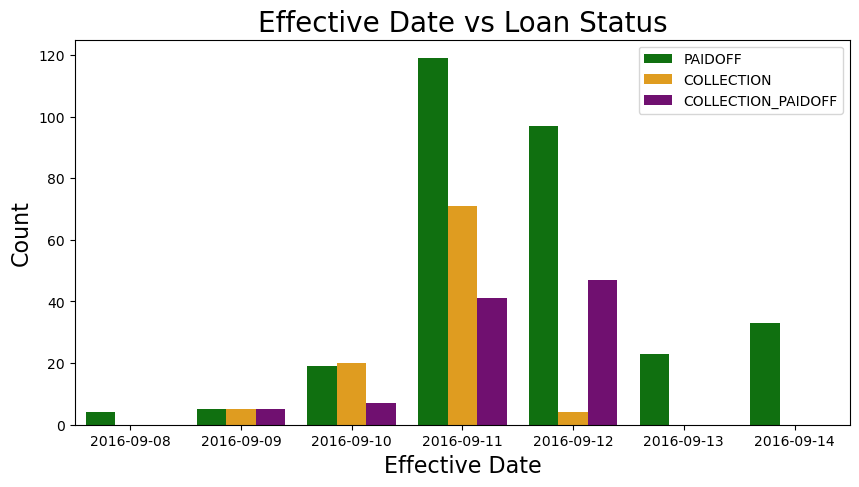

In [827]:
plt.figure(figsize = [10,5])
dates = df['effective_date'].dt.date
sns.countplot(x=dates, hue=df['loan_status'],palette=('green', 'orange', 'purple'))
plt.legend(loc='upper right')
plt.title('Effective Date vs Loan Status',fontsize=20)
plt.xlabel('Effective Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From above analysis;

On 11th and 12th September, loan was given to many people. This can be due to various factores. One of the factor may be some loan event drive.

### Age vs Past Due Days

In [828]:
px.scatter(df_fe, x="age", y="past_due_days", size ="terms" ,color="loan_status",
           hover_data=['Gender','Principal'], log_x=True, size_max=8)

Observations;

Most of the Elder people (35 - 50 years) have paid back loan on time.

# Correlation

[Text(0.5, 0, 'Principal'),
 Text(1.5, 0, 'terms'),
 Text(2.5, 0, 'past_due_days'),
 Text(3.5, 0, 'age')]

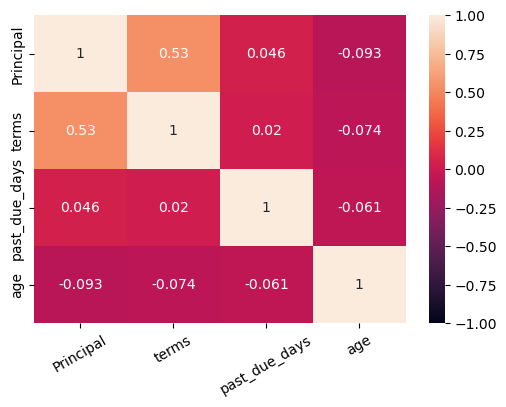

In [829]:
# To understand the overall relationship among variables
correlation = df_fe[df_fe.columns].corr()
plt.figure(figsize=(6, 4))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

### Loan Status vs Past Due Days

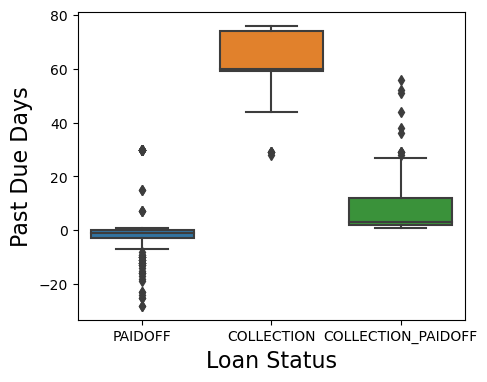

In [830]:
# Relation between loan_status and past_due_days
%matplotlib inline
plt.figure(figsize = [5,4])
sns.boxplot(x='loan_status', y='past_due_days', data=df_fe)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Past Due Days', fontsize=16)
plt.show()

Observations:

We can infer that if people take more than 25 days after due date, they might end up in taking even more time.

# Dropping columns

In [831]:
df_fe = df_fe.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1)
df_fe.head()

loan_status  Principal  terms  past_due_days  age             education  \
0     PAIDOFF       1000     30          -23.0   45  High School or Below   
1     PAIDOFF       1000     30            0.0   50              Bachelor   
2     PAIDOFF       1000     30          -12.0   33              Bachelor   
3     PAIDOFF       1000     15            0.0   27               college   
4     PAIDOFF       1000     30          -15.0   28               college   

   Gender  
0    male  
1  female  
2  female  
3    male  
4  female

In [832]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    500 non-null    object 
 1   Principal      500 non-null    int64  
 2   terms          500 non-null    int64  
 3   past_due_days  500 non-null    float64
 4   age            500 non-null    int64  
 5   education      500 non-null    object 
 6   Gender         500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


#### Creating a copy for df_fe

In [833]:
df_fe_Pri = df_fe.copy()

In [834]:
df_fe_Pri.head()

loan_status  Principal  terms  past_due_days  age             education  \
0     PAIDOFF       1000     30          -23.0   45  High School or Below   
1     PAIDOFF       1000     30            0.0   50              Bachelor   
2     PAIDOFF       1000     30          -12.0   33              Bachelor   
3     PAIDOFF       1000     15            0.0   27               college   
4     PAIDOFF       1000     30          -15.0   28               college   

   Gender  
0    male  
1  female  
2  female  
3    male  
4  female

### Dropping 'Principal' Values [300, 500, 700, 900] & 'terms' = 7 days

In [835]:
drop_term_7 = df_fe_Pri[df_fe_Pri['terms']==7]
drop_term_7

loan_status  Principal  terms  past_due_days  age  \
5               PAIDOFF        300      7           -6.0   35   
10              PAIDOFF        300      7           -5.0   29   
13              PAIDOFF        900      7           -3.0   26   
14              PAIDOFF       1000      7           -1.0   27   
42              PAIDOFF       1000      7            7.0   31   
45              PAIDOFF        800      7           -5.0   35   
68              PAIDOFF        300      7           -3.0   35   
81              PAIDOFF       1000      7           -4.0   25   
91              PAIDOFF       1000      7            0.0   32   
100             PAIDOFF       1000      7            0.0   29   
109             PAIDOFF       1000      7            7.0   29   
142             PAIDOFF       1000      7           -2.0   27   
147             PAIDOFF        300      7            0.0   37   
181             PAIDOFF        300      7           -1.0   29   
205             PAIDOFF       1000      7           -2.0   26   
208             PAIDOFF        300      7           -6.0   23   
231             PAIDOFF       1000      7            7.0   34   
244             PAIDOFF       1000      7           -5.0   31   
253             PAIDOFF        500      7           -2.0   22   
258             PAIDOFF       1000      7           -3.0   25   
432  COLLECTION_PAIDOFF        800      7            2.0   34   

                education  Gender  
5         Master or Above    male  
10                college    male  
13                college  female  
14   High School or Below    male  
42               Bachelor    male  
45   High School or Below    male  
68                college    male  
81                college    male  
91               Bachelor  female  
100  High School or Below    male  
109               college    male  
142  High School or Below    male  
147       Master or Above    male  
181  High School or Below    male  
205              Bachelor  female  
208  High School or Below    male  
231               college  female  
244               college    male  
253  High School or Below    male  
258               college    male  
432              Bachelor  female

In [836]:
drop_term_7.shape

(21, 7)

In [837]:
drop_Pri_800_1000 = df_fe_Pri[(df_fe_Pri['Principal']!=800) &(df_fe_Pri['Principal']!=1000)]
drop_Pri_800_1000

loan_status  Principal  terms  past_due_days  age  \
5               PAIDOFF        300      7           -6.0   35   
10              PAIDOFF        300      7           -5.0   29   
13              PAIDOFF        900      7           -3.0   26   
37              PAIDOFF        700     15            0.0   33   
65              PAIDOFF        900     15            0.0   28   
68              PAIDOFF        300      7           -3.0   35   
147             PAIDOFF        300      7            0.0   37   
152             PAIDOFF        500     15          -13.0   23   
181             PAIDOFF        300      7           -1.0   29   
208             PAIDOFF        300      7           -6.0   23   
253             PAIDOFF        500      7           -2.0   22   
429  COLLECTION_PAIDOFF        500     15            1.0   37   

                education  Gender  
5         Master or Above    male  
10                college    male  
13                college  female  
37   High School or Below    male  
65                college    male  
68                college    male  
147       Master or Above    male  
152               college  female  
181  High School or Below    male  
208  High School or Below    male  
253  High School or Below    male  
429              Bachelor    male

In [838]:
drop_Pri_800_1000.shape

(12, 7)

In [839]:
#Dropping rows where 'Principal' is not equal to 800 and 1000 [12 rows]
df_fe_Pri = df_fe_Pri[(df_fe_Pri['Principal']==800) | (df_fe_Pri['Principal']==1000)]

In [840]:
#Dropping rows where 'terms' = 7 days [21 rows]
df_fe_Pri = df_fe_Pri[df_fe_Pri['terms']!=7]

In [841]:
df_fe_Pri.head()

loan_status  Principal  terms  past_due_days  age             education  \
0     PAIDOFF       1000     30          -23.0   45  High School or Below   
1     PAIDOFF       1000     30            0.0   50              Bachelor   
2     PAIDOFF       1000     30          -12.0   33              Bachelor   
3     PAIDOFF       1000     15            0.0   27               college   
4     PAIDOFF       1000     30          -15.0   28               college   

   Gender  
0    male  
1  female  
2  female  
3    male  
4  female

In [842]:
df_fe_Pri.shape

(475, 7)

In [843]:
df_clean = df_fe_Pri.copy()

In [844]:
df_clean.tail()

loan_status  Principal  terms  past_due_days  age  \
495  COLLECTION_PAIDOFF       1000     30            3.0   28   
496  COLLECTION_PAIDOFF       1000     15           14.0   26   
497  COLLECTION_PAIDOFF        800     15            3.0   30   
498  COLLECTION_PAIDOFF       1000     30            1.0   38   
499  COLLECTION_PAIDOFF       1000     30            8.0   28   

                education  Gender  
495  High School or Below    male  
496  High School or Below    male  
497               college    male  
498               college  female  
499  High School or Below    male

### Age Classification

In [845]:
def age_classification(age):
    if age.item()<21:
        return 'Young'
    elif age.item()>=21 and age.item()<31:
        return 'MidAge'
    elif age.item()>=31 and age.item()<41:
        return 'Senior'
    else:
        return 'Older'

In [846]:
#Categorizing age column
df_clean['age'] = df_clean[['age']].apply(age_classification,axis=1)

# One hot encoding

One hot encoding - 'terms', 'education', 'Principal', 'age' & 'Gender'

In [847]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    475 non-null    object 
 1   Principal      475 non-null    int64  
 2   terms          475 non-null    int64  
 3   past_due_days  475 non-null    float64
 4   age            475 non-null    object 
 5   education      475 non-null    object 
 6   Gender         475 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.7+ KB


In [848]:
df_clean['terms'] = df_clean['terms'].astype('object')
df_clean['Principal'] = df_clean['Principal'].astype('object')

In [849]:
# Select the variables to be one-hot encoded
one_hot_features = ['education','Gender','Principal','age','terms']

In [850]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df_clean[one_hot_features],drop_first=True)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)
# Convert Categorical to Numerical for default column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   education_High School or Below  475 non-null    uint8
 1   education_Master or Above       475 non-null    uint8
 2   education_college               475 non-null    uint8
 3   Gender_male                     475 non-null    uint8
 4   Principal_1000                  475 non-null    uint8
 5   age_Older                       475 non-null    uint8
 6   age_Senior                      475 non-null    uint8
 7   age_Young                       475 non-null    uint8
 8   terms_30                        475 non-null    uint8
dtypes: uint8(9)
memory usage: 7.9 KB


In [851]:
one_hot_encoded.head()

education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  Gender_male  Principal_1000  age_Older  age_Senior  \
0                  0            1               1          1           0   
1                  0            0               1          1           0   
2                  0            0               1          0           1   
3                  1            1               1          0           0   
4                  1            0               1          0           0   

   age_Young  terms_30  
0          0         1  
1          0         1  
2          0         1  
3          0         0  
4          0         1

In [852]:
# Concatinating df_clean and one_hot_endoded
df_encoded = pd.concat([df_clean,one_hot_encoded],axis=1)
df_encoded.head()

loan_status Principal terms  past_due_days     age             education  \
0     PAIDOFF      1000    30          -23.0   Older  High School or Below   
1     PAIDOFF      1000    30            0.0   Older              Bachelor   
2     PAIDOFF      1000    30          -12.0  Senior              Bachelor   
3     PAIDOFF      1000    15            0.0  MidAge               college   
4     PAIDOFF      1000    30          -15.0  MidAge               college   

   Gender  education_High School or Below  education_Master or Above  \
0    male                               1                          0   
1  female                               0                          0   
2  female                               0                          0   
3    male                               0                          0   
4  female                               0                          0   

   education_college  Gender_male  Principal_1000  age_Older  age_Senior  \
0                  0            1               1          1           0   
1                  0            0               1          1           0   
2                  0            0               1          0           1   
3                  1            1               1          0           0   
4                  1            0               1          0           0   

   age_Young  terms_30  
0          0         1  
1          0         1  
2          0         1  
3          0         0  
4          0         1

In [853]:
# Dropping features
df_encoded.drop(['terms','education','Gender','age','Principal'],axis=1,inplace = True)
df_encoded.head()

loan_status  past_due_days  education_High School or Below  \
0     PAIDOFF          -23.0                               1   
1     PAIDOFF            0.0                               0   
2     PAIDOFF          -12.0                               0   
3     PAIDOFF            0.0                               0   
4     PAIDOFF          -15.0                               0   

   education_Master or Above  education_college  Gender_male  Principal_1000  \
0                          0                  0            1               1   
1                          0                  0            0               1   
2                          0                  0            0               1   
3                          0                  1            1               1   
4                          0                  1            0               1   

   age_Older  age_Senior  age_Young  terms_30  
0          1           0          0         1  
1          1           0          0         1  
2          0           1          0         1  
3          0           0          0         0  
4          0           0          0         1

# Label Encoding

#### Label Encoding for 'loan_status'

In [854]:
df_clean['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [855]:
loan_status_dict = {'PAIDOFF':1,'COLLECTION':2,'COLLECTION_PAIDOFF':3}
df_encoded['loan_status'] = df_encoded.loan_status.map(loan_status_dict)
df_encoded.head()

loan_status  past_due_days  education_High School or Below  \
0            1          -23.0                               1   
1            1            0.0                               0   
2            1          -12.0                               0   
3            1            0.0                               0   
4            1          -15.0                               0   

   education_Master or Above  education_college  Gender_male  Principal_1000  \
0                          0                  0            1               1   
1                          0                  0            0               1   
2                          0                  0            0               1   
3                          0                  1            1               1   
4                          0                  1            0               1   

   age_Older  age_Senior  age_Young  terms_30  
0          1           0          0         1  
1          1           0          0         1  
2          0           1          0         1  
3          0           0          0         0  
4          0           0          0         1

In [856]:
df_model = df_encoded.copy()

In [857]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     475 non-null    int64  
 1   past_due_days                   475 non-null    float64
 2   education_High School or Below  475 non-null    uint8  
 3   education_Master or Above       475 non-null    uint8  
 4   education_college               475 non-null    uint8  
 5   Gender_male                     475 non-null    uint8  
 6   Principal_1000                  475 non-null    uint8  
 7   age_Older                       475 non-null    uint8  
 8   age_Senior                      475 non-null    uint8  
 9   age_Young                       475 non-null    uint8  
 10  terms_30                        475 non-null    uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 15.3 KB


In [858]:
df_model.head()

loan_status  past_due_days  education_High School or Below  \
0            1          -23.0                               1   
1            1            0.0                               0   
2            1          -12.0                               0   
3            1            0.0                               0   
4            1          -15.0                               0   

   education_Master or Above  education_college  Gender_male  Principal_1000  \
0                          0                  0            1               1   
1                          0                  0            0               1   
2                          0                  0            0               1   
3                          0                  1            1               1   
4                          0                  1            0               1   

   age_Older  age_Senior  age_Young  terms_30  
0          1           0          0         1  
1          1           0          0         1  
2          0           1          0         1  
3          0           0          0         0  
4          0           0          0         1

[Text(0.5, 0, 'loan_status'),
 Text(1.5, 0, 'past_due_days'),
 Text(2.5, 0, 'education_High School or Below'),
 Text(3.5, 0, 'education_Master or Above'),
 Text(4.5, 0, 'education_college'),
 Text(5.5, 0, 'Gender_male'),
 Text(6.5, 0, 'Principal_1000'),
 Text(7.5, 0, 'age_Older'),
 Text(8.5, 0, 'age_Senior'),
 Text(9.5, 0, 'age_Young'),
 Text(10.5, 0, 'terms_30')]

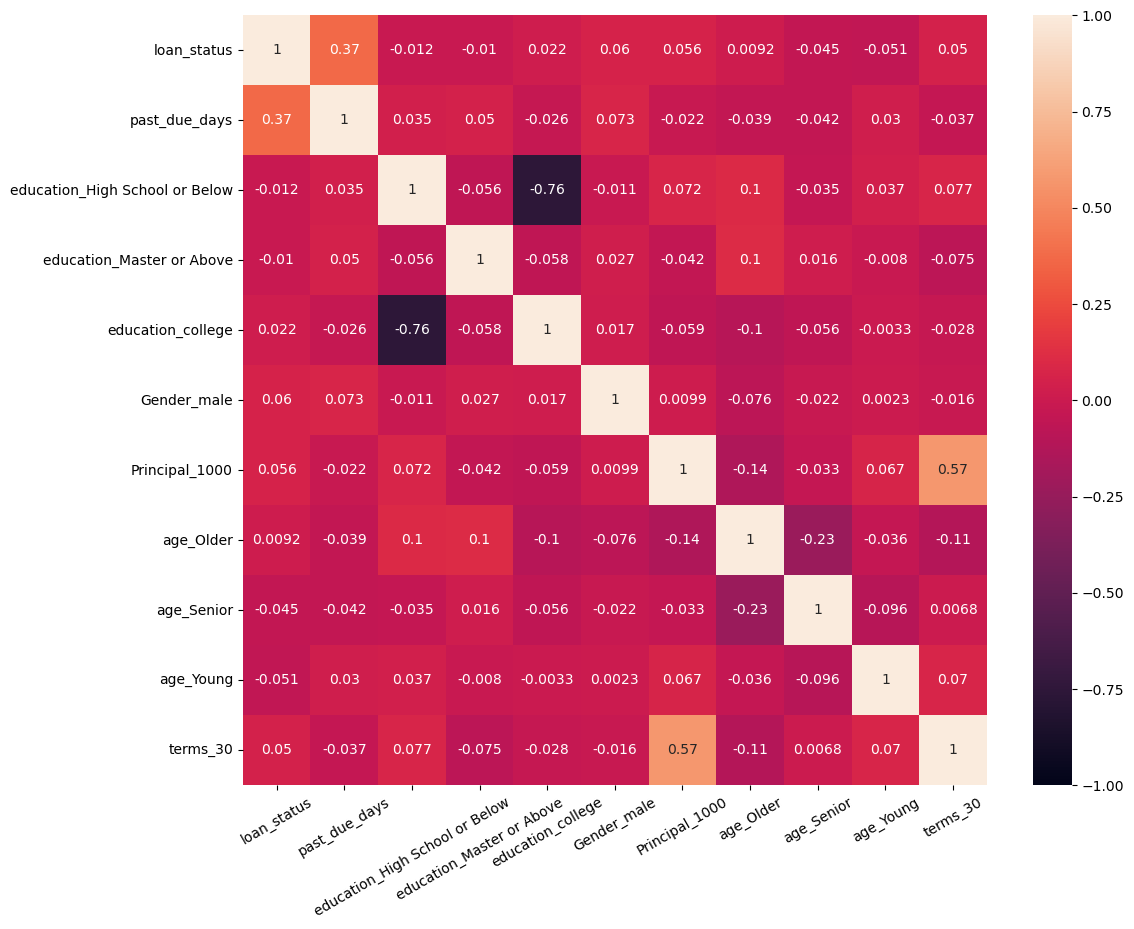

In [859]:
correlation = df_model[df_model.columns].corr()
plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

# Model Building

In [860]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [861]:
#Standardize rows into uniform scale
X = df_model.drop(['loan_status','past_due_days'],axis=1)
y = df_model['loan_status']

In [862]:
X.head()

education_High School or Below  education_Master or Above  \
0                               1                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   education_college  Gender_male  Principal_1000  age_Older  age_Senior  \
0                  0            1               1          1           0   
1                  0            0               1          1           0   
2                  0            0               1          0           1   
3                  1            1               1          0           0   
4                  1            0               1          0           0   

   age_Young  terms_30  
0          0         1  
1          0         1  
2          0         1  
3          0         0  
4          0         1

In [863]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=400,test_size=0.30,stratify = y)

In [864]:
from collections import Counter
print("y : ",Counter(y))
print("y_train : ",Counter(y_train))
print("y_test : ",Counter(y_test))

y :  Counter({1: 277, 2: 100, 3: 98})
y_train :  Counter({1: 194, 2: 70, 3: 68})
y_test :  Counter({1: 83, 2: 30, 3: 30})


In [865]:
# Actual Values(of Majority Class) of y_test
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

1    0.58042
Name: loan_status, dtype: float64

## Function To Run Different Models

In [866]:
# metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [867]:
def model_train(model, name):
    model.fit(X_train, y_train)                                    # Fitting the model
    y_pred = model.predict(X_test)                                 # Making prediction from the trained model
    cm = confusion_matrix(y_test, y_pred)                               
    print("Grid Search Confusion Matrix " +" Validation Data")     # Displaying the Confusion Matrix
    print(cm)
    print('-----------------------')
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")     # Displaying the Classification Report
    print(cr)
    print('------------------------')
    print(name + " Bias")                                          # Calculating bias
    bias = y_pred - y_test.mean()
    print("Bias "+ str(bias.mean()))
    
    print(name + " Variance")                                      # Calculate Variance
    var = np.var([y_test, y_pred], axis=0)
    print("Variance " + str(var.mean()) )
#     return auc, rec, model
    return model

Let's try to check the metrics with couple of models.

# Logistic Regression

In [868]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1000,max_iter=500,class_weight='balanced')    
# Set Large C value for low regularization to prevent overfitting
# logreg.fit(X_train, y_train)

dt_model = model_train(logreg, "Logistic Regression")
print('_________________________')
print("Coefficients: ",logreg.coef_)                                           
# Coefficients for Logistic Regression

print("Intercepts: ",logreg.intercept_)

Grid Search Confusion Matrix  Validation Data
[[16 40 27]
 [ 8 15  7]
 [ 6 18  6]]
-----------------------
-----------------------
Logistic Regression Classification Report  Validation Data
              precision    recall  f1-score   support

           1       0.53      0.19      0.28        83
           2       0.21      0.50      0.29        30
           3       0.15      0.20      0.17        30

    accuracy                           0.26       143
   macro avg       0.30      0.30      0.25       143
weighted avg       0.38      0.26      0.26       143

------------------------
Logistic Regression Bias
Bias 0.4405594405594407
Logistic Regression Variance
Variance 0.3583916083916084
_________________________
Coefficients:  [[ 0.13401422 -1.50325146  0.11057859 -0.5515105  -0.08077721 -0.08971282
   0.12079034  2.21758562 -0.08065953]
 [ 0.23954372  5.03203575  0.12948316  0.5215556  -0.30405095 -0.42090718
  -0.10686589  1.75082513  0.18171277]
 [-0.37355794 -3.52878429 -0.24

# Decision Tree

In [869]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 4, min_samples_leaf =2,random_state=101,class_weight='balanced')

dt_model = model_train(dt, "Decision Tree")

Grid Search Confusion Matrix  Validation Data
[[ 9 40 34]
 [ 6 17  7]
 [ 2 14 14]]
-----------------------
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

           1       0.53      0.11      0.18        83
           2       0.24      0.57      0.34        30
           3       0.25      0.47      0.33        30

    accuracy                           0.28       143
   macro avg       0.34      0.38      0.28       143
weighted avg       0.41      0.28      0.24       143

------------------------
Decision Tree Bias
Bias 0.6363636363636366
Decision Tree Variance
Variance 0.3688811188811189


From the above results, we can observe that:

1. F1 Score using Logistic regression = 0.26

2. F1 Score using Decision Tree = 0.28

The results are low due to the imbalance in the class categories.


#### Let's try to apply sampling methods to overcome this issue

In [870]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# SMOTE - OverSampling

In [871]:
!pip install -U imbalanced-learn

In [872]:
from imblearn.over_sampling import KMeansSMOTE

In [874]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE,KMeansSMOTE,SVMSMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
smote = KMeansSMOTE(sampling_strategy='auto')

In [875]:
# perform oversampling using fit_resample
X_sm, y_sm = smote.fit_resample(X, y)

# print the shapes of the oversampled dataset
print(X_sm.shape, y_sm.shape)

(832, 9) (832,)


In [876]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,random_state=400,test_size=0.30,stratify = y_sm)

In [877]:
from collections import Counter
print("y : ",Counter(y))
print("y_train : ",Counter(y_train))
print("y_test : ",Counter(y_test))

y :  Counter({1: 277, 2: 100, 3: 98})
y_train :  Counter({2: 194, 1: 194, 3: 194})
y_test :  Counter({2: 84, 3: 83, 1: 83})


In [878]:
# Actual Values(of Majority Class) of y_test
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

2    0.336
Name: loan_status, dtype: float64

# Logistic Regression

In [879]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1000,max_iter=500,class_weight='balanced')
# solver ='lbfgs',class_weight='balanced'    # Set Large C value for low regularization to prevent overfitting
# logreg.fit(X_train, y_train)

dt_model = model_train(logreg, "Logistic Regression")
print('_________________________')
print("Coefficients: ",logreg.coef_)                                           
# Coefficients for Logistic Regression

print("Intercepts: ",logreg.intercept_)

Grid Search Confusion Matrix  Validation Data
[[42 16 25]
 [23 55  6]
 [14  4 65]]
-----------------------
-----------------------
Logistic Regression Classification Report  Validation Data
              precision    recall  f1-score   support

           1       0.53      0.51      0.52        83
           2       0.73      0.65      0.69        84
           3       0.68      0.78      0.73        83

    accuracy                           0.65       250
   macro avg       0.65      0.65      0.65       250
weighted avg       0.65      0.65      0.65       250

------------------------
Logistic Regression Bias
Bias 0.068
Logistic Regression Variance
Variance 0.205
_________________________
Coefficients:  [[-0.19576345  0.         -0.2003811  -0.36384542 -0.31801376  0.04414472
  -0.38057904  2.3081156  -0.48484386]
 [ 1.34692772  0.         -0.19924578  0.61970082 -0.20752788  0.08974243
   0.9828943   2.52223466 -0.3403991 ]
 [-1.15116428  0.          0.39962688 -0.2558554   0.5255

# Desicion Tree

In [880]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 4, min_samples_leaf =2,random_state=101)

dt_model = model_train(dt, "Decision Tree")

Grid Search Confusion Matrix  Validation Data
[[50 11 22]
 [24 54  6]
 [14  4 65]]
-----------------------
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

           1       0.57      0.60      0.58        83
           2       0.78      0.64      0.71        84
           3       0.70      0.78      0.74        83

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250

------------------------
Decision Tree Bias
Bias 0.02
Decision Tree Variance
Variance 0.189


# Hyperparameter Optimization

In [881]:
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators': range(5,20),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

rf = RandomForestClassifier()

rf_gs = GridSearchCV(rf, random_grid, cv = 3, n_jobs=1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=7; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=7; total time

In [882]:
print(rf_gs.best_estimator_)
print('-----------------------')
print("Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')
print("Grid Search Bias")                                                 # Calculating bias
bias = y_pred - y_test.mean()
print("Bias "+ str(bias.mean()))
    
print("Grid Search Variance")                                             # Calculate Variance
var = np.var([y_test, y_pred], axis=0)
print("Variance " + str(var.mean()) )

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=14)
-----------------------
Grid Search Validation Data
Grid Search Confusion Matrix  Validation Data
[[51 13 19]
 [24 54  6]
 [14  5 64]]
-----------------------
Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

           1       0.57      0.61      0.59        83
           2       0.75      0.64      0.69        84
           3       0.72      0.77      0.74        83

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250

------------------------
Grid Search Bias
Bias 0.0
Grid Search Variance
Variance 0.18


# Conclusion

From the Logistic Regression and Decision tree model, we have acheived an accuracy of 65% and 68% respectively after applying SMOTE technique on the imbalanced target class.

# Interpreting the confusion matrix

[51 13 19]

The first row of the matrix shows the performance for the first class. Out of 83 instances of this class, the classifier correctly predicted 51 instances as belonging to this class, but it incorrectly predicted 13 instances as belonging to the second class, and 19 instances as belonging to the third class.

[24 54  6]

The second row shows the performance for the second class. Out of 84 instances of this class, the classifier correctly predicted 54 instances as belonging to this class, but it incorrectly predicted 24 instances as belonging to the first class, and 6 instances as belonging to the third class.

[14  5 64]

The third row shows the performance for the third class. Out of 83 instances of this class, the classifier correctly predicted 64 instances as belonging to this class, but it incorrectly predicted 14 instances as belonging to the first class, and 5 instances as belonging to the second class.